# Requirements

[Schoenberg Website](http://www.stat.ucla.edu/~frederic/416/F19/416day03.pdf)

## Deadlines
* Oral Presentation (10%) last week of class Dec2. 
* Written project (45%) due Dec8 by 8pm, by email to me at frederic@stat.ucla.edu. 

## Written Content Requirements
* Find a spatial-temporal point process dataset and analyze it using some of the relevant methods described in class. 
* Your report should contain about 4-6 pages of text, followed by as many figures as appropriate. 
* You may include as many figures as you like, but the text itself should not exceed 6 pages, double-spaced. 
* In selecting your dataset, choose something that interests you, and try to choose a dataset where the quantification of clustering or inhibition of the locations of the points would be of interest. 
    1. Begin your paper with:
        * an introduction, 
        * a description of your data and how they were obtained, 
        * and a summary of the main questions to be addressed in your paper. 
    2. Then summarize your analyses, paying special attention to the plausibility of assumptions you are making.
    3. Conclude by assessing how effective the methods you used were in helping to answer your main questions. 

## Oral Presentation Requirements
* Oral presentations of project results will take place on the last 2 weeks of class. 
* These will involve simply presenting a clear and concise 10-12 minute summary of your dataset including a couple of your main results. Do not feel you have to show all the results from your paper in your oral presentation! 
* You should probably only show around 8-10 slides in your presentation. 
* Email me a pdf of your slides the night before your presentation, by 8pm, so I can have them ready before class starts. You will use my computer in class.
    1. **Rule 1**: Do not look at me when you are talking.
    2. **Rule 2**: 10-12 minutes per oral report, plus questions at the end. I will cut you off if you go over 12 min. Have someone in the audience help you with the time if you want. I will tell you when there are 2 min left, and then I will tell you to stop.
    3. **Rule 3**: Everyone must be respectful and quiet during other people's talks. You can ask clarifying questions but keep deep questions until the end.
    4. **Rule 4**: Send me a pdf version of your slides by 8pm the night before your talk, to frederic@stat.ucla.edu. That way, I can set up the talks in order ahead of time and we won't have to waste time in class waiting for each person to connect their laptop to the projector. About 8-10 slides seems right, though it's fine with me if you want fewer or more. You will use my laptop. 
    5. **Rule 5**: Speak very slowly in the beginning. Give us a sense of your data. Assume that the listener knows everything about point processes, but knows nothing about the subject matter. Tell us what the methods say about your data. Emphasize the results more than the methods. Make sure to go slowly and clearly in the start so that the listener really understands what your data are.
    6. **Rule 6**: Speculate and generalize but use careful language. Say "It seems" or "appears" rather than "is" when it comes to speculative statements or models. For example, you might say "The points appear roughly homogeneous" or "a Hawkes model seems to fit well" but not "The data are uniformly distributed" or "The data come from a homogeneous Poisson model".
    7. **Rule 7**: Start with an introduction explaining what your data are, how you got them, and why they are interesting (roughly 2-3 minutes), then show your results as clearly as possible, with figures preferred (roughly 5 minutes), and then conclude (roughly 2-3 minutes). In your conclusion, mention the limitations of your analysis and speculate about what might make a future analysis better, if you had infinite time. This might include collecting more data, or getting data on more variables, as well as more sophisticated statistical methods.


## Data Requirements
* Your dataset, which you will find yourselves, on the web, can be anything you choose, but it should be: 
    1. spatial or spatial-temporal point process data. You should have between n=50 and 5000 observations.
    2. something of genuine interest to you, and where you have more knowledge than an average person. 
    3. You can have covariate information or not, but the points should be of interest on their own. 
    4. Analyze the data using the methods we have talked about in class, including:
        * doing kernel smoothing, 
        * estimating standard functions like the J function and L function,
        * and fit models by maximum likelihood. 
        * Comment on your fitted model.
* Your final project should be submitted to me in pdf by email to frederic@stat.ucla.edu. Do not send them via ccle. They are all due the same date, regardless when your oral presentation is. 

# Code

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pysal

from matplotlib.patches import Circle, Rectangle, Arc

%matplotlib inline

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [19]:
shot_df = pd.read_csv('data/shot_data.csv', index_col=0)
shot_df.columns = [c.lower() for c in shot_df.columns]

In [20]:
shot_df.loc[:,'y'] = shot_df.loc[:,'loc_y']*-1
shot_df.loc[:,'x'] = shot_df.loc[:,'loc_x']

# make bottom left point 0,0
shot_df.loc[:,'y'] = shot_df.loc[:,'y'] - np.min(shot_df.loc[:,'y'])
shot_df.loc[:,'x'] = shot_df.loc[:,'x'] - np.min(shot_df.loc[:,'x'])

In [21]:
df = shot_df.copy()

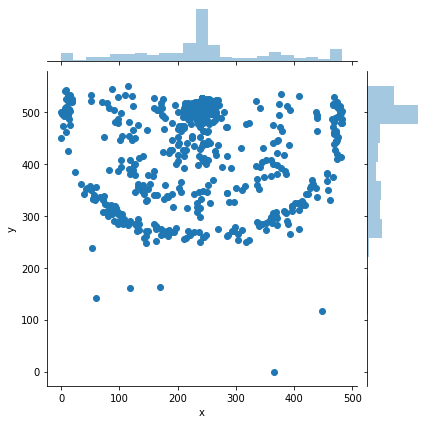

In [22]:
sns.jointplot(df['x'], df['y'])

In [23]:
print("{0} rows and {1} columns".format(df.shape[0], df.shape[1]))
print("Min X:{0}, Max X:{1}, Min Y:{2}, Max Y:{3}".format(df['x'].min(), 
                                                            df['x'].max(), 
                                                            df['y'].min(), 
                                                            df['y'].max()))

625 rows and 26 columns
Min X:0, Max X:483, Min Y:0, Max Y:551


In [24]:
# http://savvastjortjoglou.com/nba-shot-sharts.html

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


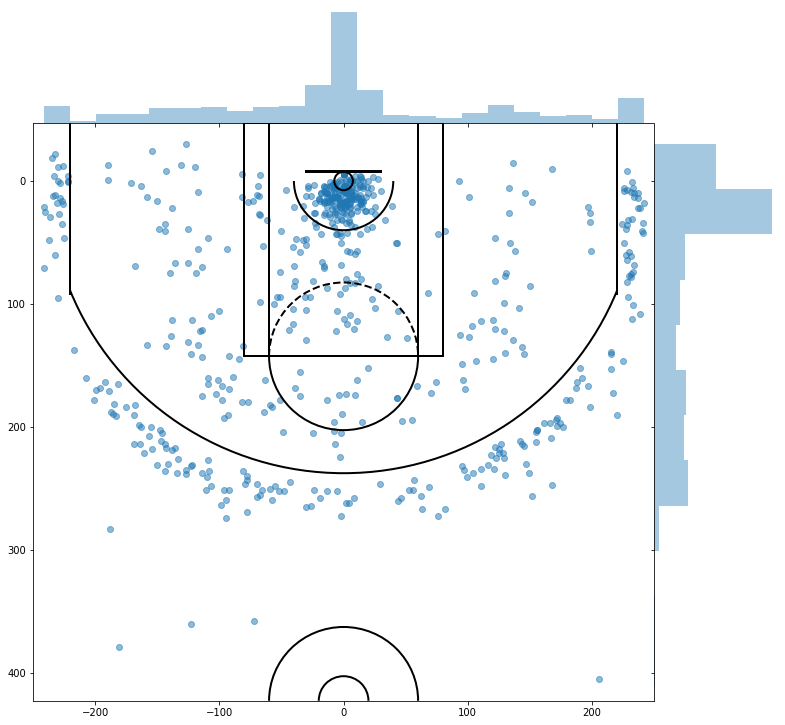

In [25]:
cmap=plt.cm.gist_heat_r

joint_shot_chart = sns.jointplot(df['loc_x'], df['loc_y'], stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('Los Angeles Lakers FGA 2018-19 Reg. Season', 
             y=1.2, fontsize=18)

plt.show()

## Kernel Smoothing

In [26]:
def bw_nrd0(x):

    if len(x) < 2:
        raise(Exception("need at least 2 data points"))

    hi = np.std(x, ddof=1)
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    lo = min(hi, iqr/1.34)

    if not lo:
        if hi:
            lo = hi
        elif abs(x[0]):
            lo = abs(x[0])
        else:
            lo = 1

    return 0.9 * lo *len(x)**-0.2

In [27]:
bdw = np.sqrt(bw_nrd0(df['x'])**2 + bw_nrd0(df['y'])**2)

In [28]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

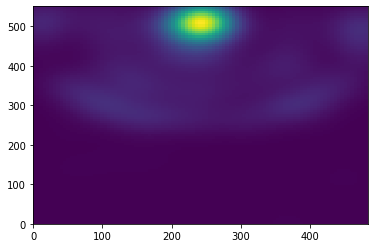

In [29]:
xx, yy, zz = kde2D(df['x'], df['y'], bdw)
plt.pcolormesh(xx, yy, zz)
# plt.scatter(df['x'],df['y'], s=2)

/Users/andrewsang/anaconda3/envs/stats416/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


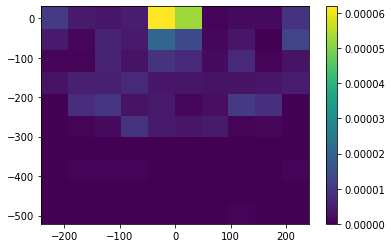

In [30]:
# https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67

h = plt.hist2d(df['loc_x'], df['loc_y']*-1, normed=True)
plt.colorbar(h[3])

In [31]:
df.head()

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,event_type,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm,y,x
0,Shot Chart Detail,21900002,259,202340,Avery Bradley,1610612747,Los Angeles Lakers,2,5,12,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-229,27,1,1,20191022,LAC,LAL,494,12
1,Shot Chart Detail,21900002,262,202340,Avery Bradley,1610612747,Los Angeles Lakers,2,4,48,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,16,11,162,1,1,20191022,LAC,LAL,359,252
2,Shot Chart Detail,21900002,271,202340,Avery Bradley,1610612747,Los Angeles Lakers,2,4,13,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,51,128,1,0,20191022,LAC,LAL,393,292
3,Shot Chart Detail,21900002,378,202340,Avery Bradley,1610612747,Los Angeles Lakers,3,10,5,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-79,246,1,0,20191022,LAC,LAL,275,162
4,Shot Chart Detail,21900002,610,202340,Avery Bradley,1610612747,Los Angeles Lakers,4,4,41,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-227,35,1,0,20191022,LAC,LAL,486,14


In [38]:
df.loc[:,'norm_x'] = df.loc[:,'x'] / df.loc[:,'x'].max()
df.loc[:,'norm_y'] = df.loc[:,'y'] / df.loc[:,'y'].max()

In [39]:
# export cleaned version
df.to_csv('data/shot_data_clean.csv', index=False)